# Introduction

![](https://4.bp.blogspot.com/--VcYZ84eGSM/UWqKVLEU0SI/AAAAAAAADNM/2m6wjEzpjOA/s1600/%C5%9EARAP.jpg)

## Context

This is a wine review data set.

In this data set, there are information such as country, city, region where the wines are produced, as well as information such as prices and scores of wines.

## Content
1. [Load and Check Data](#0)
1. [Dataset Description](#1)
1. [Missing Value Analysis](#2)
    * [Defining and Visualizing Missing Values](#3)
    * [Testing the Randomness of Missing Values](#4)
    * [Operations on Missing Values](#5)
1. [Outlier Value Analysis](#6)
    * [Outlier Value Detection Using Boxplot and Histogram](#7)
    * [Outlier Value Analysis With IQR](#8) 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
import missingno as msno # visualizatin for missing values

import warnings
warnings.filterwarnings("ignore") # ignore warnings

<a id="0"></a>
# Load and Check Data

* Load file


In [2]:
wine = pd.read_csv("winemag-data_first150k.csv")
df = wine.copy()

* First 5 records in the Dataset

In [83]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


<a id="1"></a>
# Dataset Description

* With the info() function, we can see the total number of variables in the data set, the types of these variables and the number of observations in the variables.
* Our Dataset consists of 150930 rows and 11 columns.
* The most missing value is seen in the region_2 column.
* Variables and types:
    - float64(1):price
    - int64(2):Unnamed: 0, points
    - object(8):country, description, designation, province, region_1, region_2, variety, winery

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


* Dataset variable names.

In [85]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

### Variable Description

 1. **Unnamed: 0**:  A variable with no name and a variable specifying indexes will be deleted below because it is unnecessary.
 1. **country**:  Variable indicating the countries of wines.
 1. **description**:  A variable with descriptions about wines.
 1. **designation**: Wine names.
 1. **points**:  Scores of wines. (min=80, max=100)
 1. **price**:  Prices of wines.
 1. **province**: The variable that indicates the city where the wines are located in the country.
 1. **region_1**: Region in the province.
 1. **region_2**: Region in the province.
 1. **variety**: Grape varieties.
 1. **winery**: Winery names.

* Unnecessary variable deletion.

In [86]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

* Check, delete successful. Our new number of variables is 10.

In [87]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

* Statistical information about the dataset.
    * You can access information such as means, medians, standard deviations, minimum and maximum values of numerical variables with the describe() function.

In [88]:
round(df.describe(),3) 

,points,price
count,150930.000,137235.000
mean,87.888,33.131
std,3.222,36.323
min,80.000,4.000
25%,86.000,16.000
50%,88.000,24.000
75%,90.000,40.000
max,100.000,2300.000


* The correlation of numerical variables is examined in the dataset. It is determined that there is a moderate relationship between the variables.

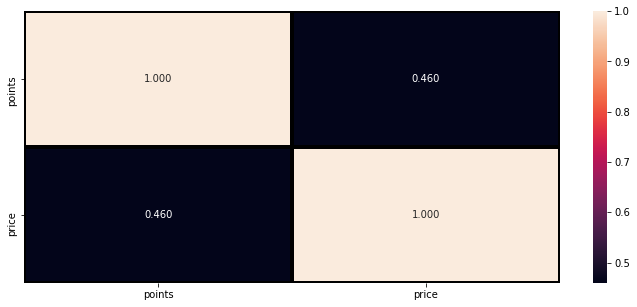

In [89]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,linewidth=2.5,fmt='.3F',linecolor='black');

* The relationship between numerical variables is examined. It cannot be said that there is a linear relationship between price and point variables when the data are examined.

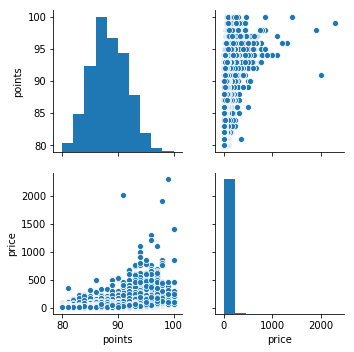

In [90]:
sns.pairplot(df);

<a id="2"></a>
# Missing Value Analysis

*Used when the values in the dataset are missing.
Missing values are generally NA.*

* Is there any missing value in the data set?

In [91]:
df.isnull().values.any()

True

<a id="3"></a>
## Defining and Visualizing Missing Values

* Total missing values in the variables.

In [92]:
df.isnull().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

* Looking at the graph, the data at the top shows the missing data in the variables. On the left, it shows the percentages in the dataset. On the right, it shows the number of observations in the dataset. At the bottom of the graph, there are variable names.

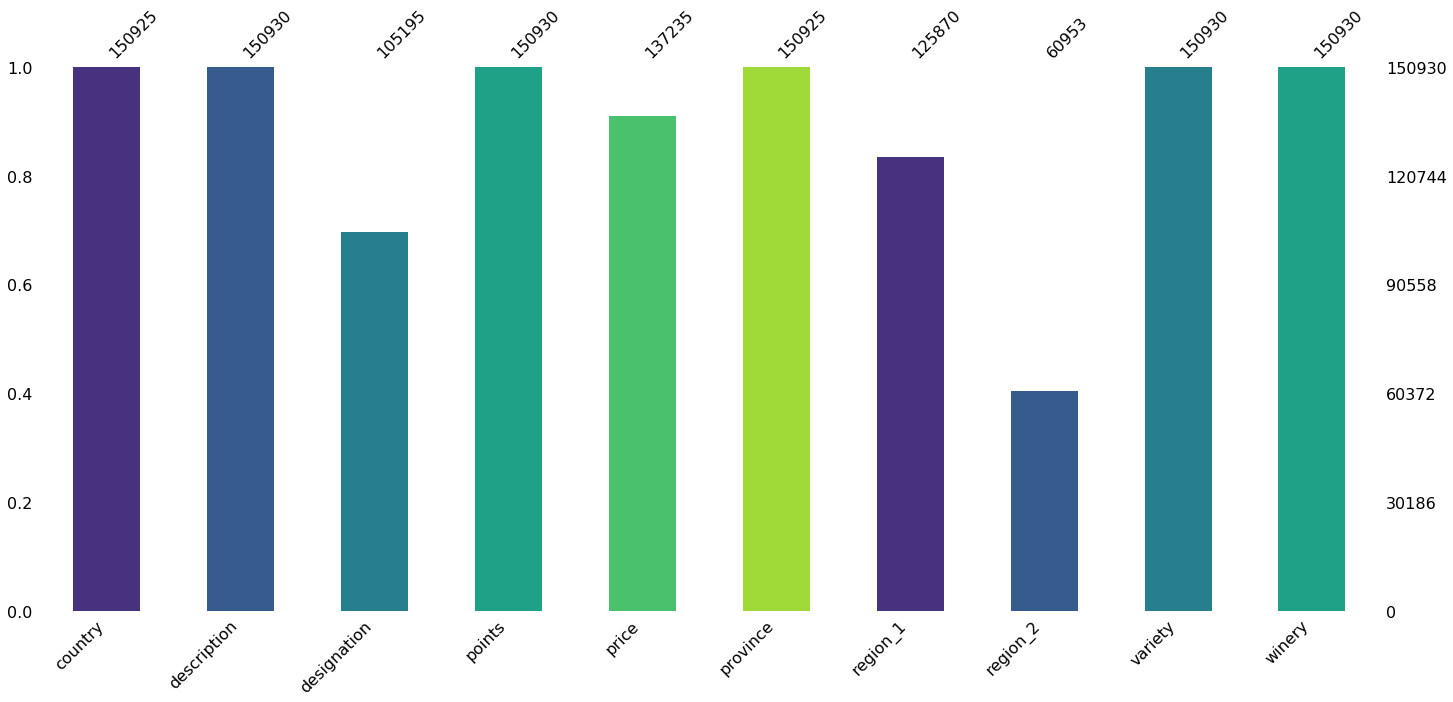

In [93]:
msno.bar(df,color = sns.color_palette('viridis'));

<a id="4"></a>
## Testing the Randomness of Missing Values

* When the graphic is examined, there are observation information in the data set on the left part, variable names in the upper part and missing observations on the right part.

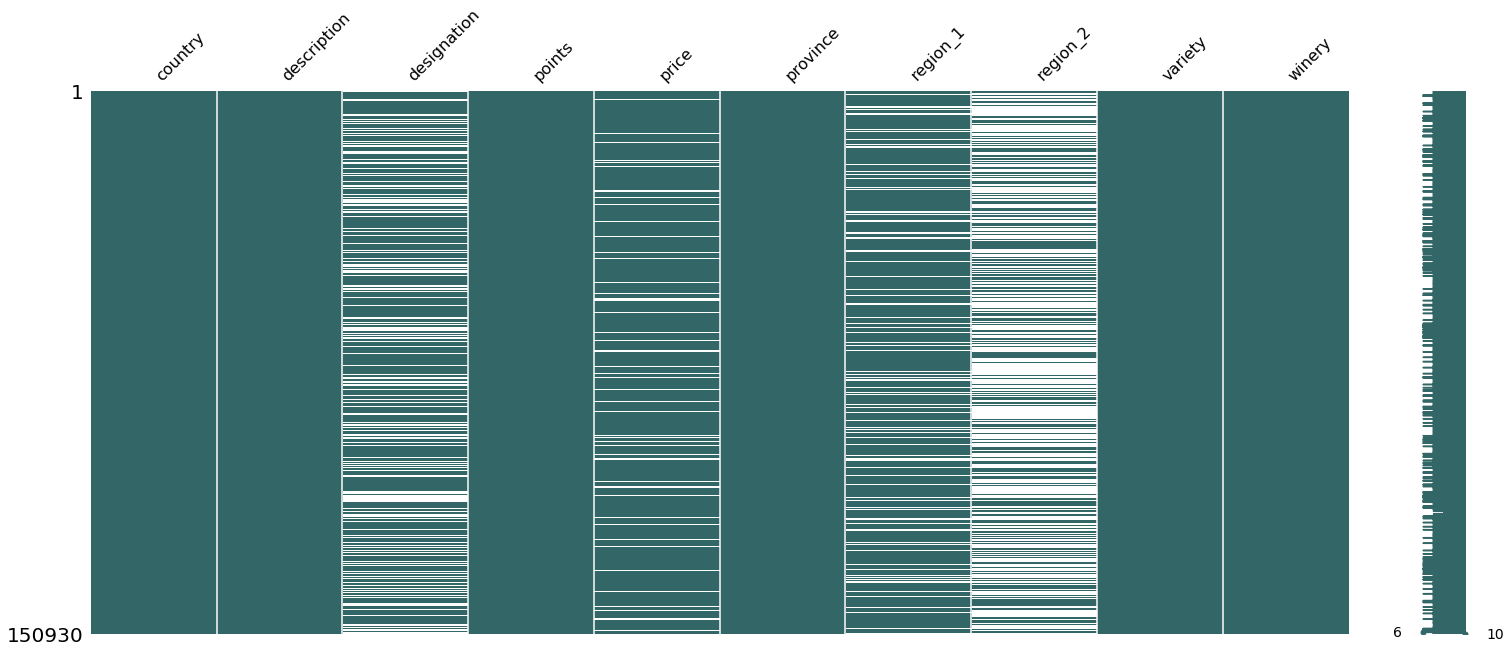

In [111]:
msno.matrix(df, color = (0.2, 0.4, 0.4));

* Heat maps are used to learn the relationships between variables. The values in this graph range from -1 to 1. If the value is 1 there is a correct relationship between the two variables, if the value is -1 there is a inverse relationship between the two variables. If the value is 0, there is no relationship between the two variables.

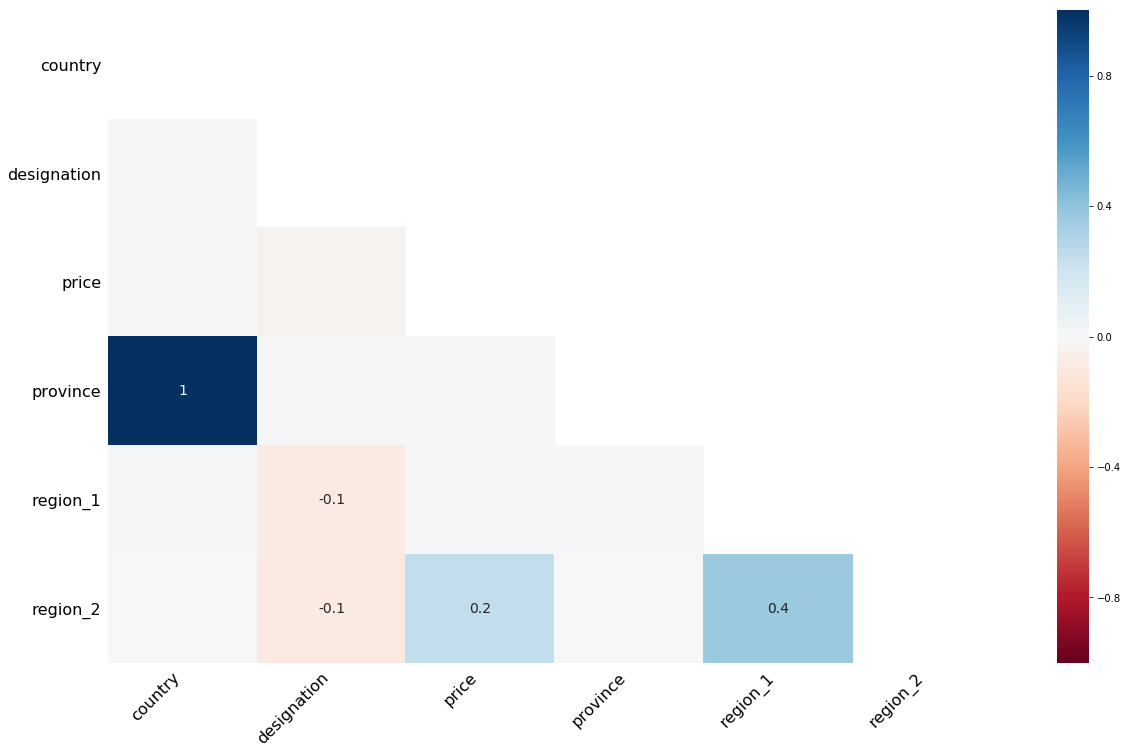

In [112]:
msno.heatmap(df);

* Missing value numbers and percentages.

In [113]:
# Missing Value Table
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("red", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(df)

,Missing Values,% Value
region_2,89977,59
designation,45735,30
region_1,25060,16
price,13695,9
province,5,0
country,5,0
winery,0,0
variety,0,0
points,0,0
description,0,0


<a id="5"></a>
## Operations on Missing Values

### Deleting Missing Values

* Since there is 59% missing value in region_2 variable, it is decided to delete it.

In [114]:
df.drop("region_2", axis = 1, inplace = True)

### Filling in the Missing Values

* In order to fill the missing values in the price variable, the average of the price variable is calculated according to the country and province variables.

In [115]:
df['price'] = df['price'].fillna(df.groupby(['country','province'])['price'].transform('mean'))

* Although we filled the price variable, the reason for showing 28 missing values ​​is that there is no price for the wine in that country and the city.

In [116]:
df.isnull().sum()

country            5
description        0
designation    45735
points             0
price             28
province           5
region_1       25060
variety            0
winery             0
dtype: int64

* 28 price values that could not be filled with the average were deleted from the dataset.

In [117]:
df = df[~(df.price.isnull())]

* When filling other variables, it will be filled according to the previous value. The data set for this operation is sorted by country, province and region 1 variable.

In [118]:
df=df.sort_values(by=["country","province","region_1"],ascending=True)
df.head()

,country,description,designation,points,price,province,region_1,variety,winery
4642,Albania,This garnet-colored wine made from 100% Kallme...,NaN,88,20.0,Mirditë,NaN,Kallmet,Arbëri
4864,Albania,This garnet-colored wine made from 100% Kallme...,NaN,88,20.0,Mirditë,NaN,Kallmet,Arbëri
269,Argentina,"Immediately this smells raisiny, but with time...",Single Vineyard Reserva,88,15.0,Mendoza Province,Agrelo,Cabernet Sauvignon,Lamadrid
6003,Argentina,Light prune aromas signify a wine on the cusp....,Malbec-Merlot-Cabernet Sauvignon,81,19.0,Mendoza Province,Agrelo,Bordeaux-style Red Blend,Trapezio
13438,Argentina,Blackberry and rubber aromas are friendly and ...,Reserva Old Vine,90,29.0,Mendoza Province,Agrelo,Malbec,Martino


* Filling with the previous value.

In [119]:
df=df.fillna(method="ffill")

<a id="6"></a>
# Outlier Value Analysis

*Observations that go far beyond the general trend in the data or that are quite different from other observations are called contradictory observations.*

<a id="7"></a>
## Outlier Value Detection Using Boxplot and Histogram

* For Points:
    The minimum value is 80, the maximum value is 100. This is actually a variable that is between certain values, so it would be unreasonable to study outliers.

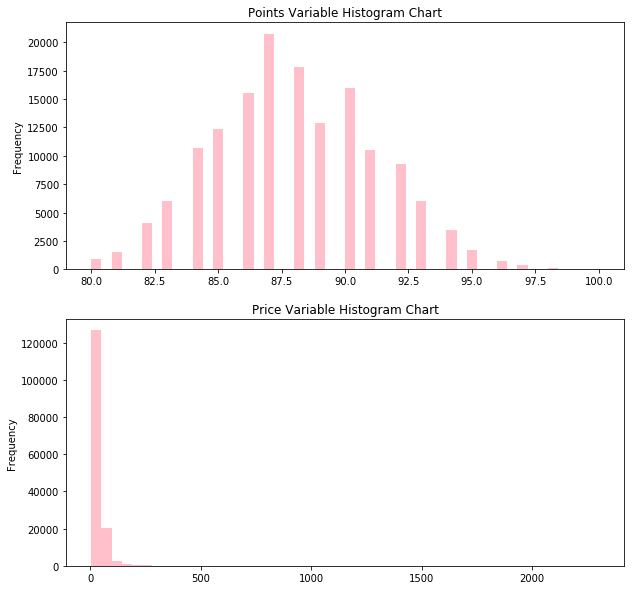

In [120]:
plt.subplot(2,1,1)
df.points.plot(kind='hist',color='pink',bins=50,figsize=(10,10))
plt.title("Points Variable Histogram Chart");


plt.subplot(2,1,2)
df.price.plot(kind='hist',color='pink',bins=50,figsize=(10,10))
plt.title("Price Variable Histogram Chart");

<a id="8"></a>
## Outlier Value Analysis With IQR

* Points with Boxplot

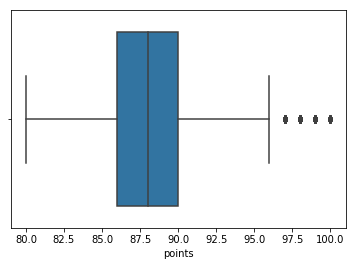

In [121]:
sns.boxplot(df.points);

* Price with Boxplot

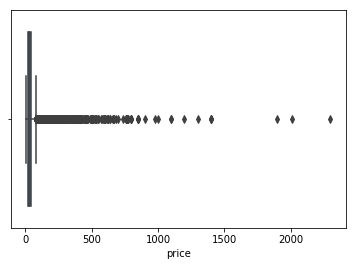

In [122]:
sns.boxplot(df.price);

**IQR (Interquartile Range)**

IQR is the distance between the first quarter Q1 and the third quarter Q3. Using IQR, upper and lower limit values are calculated as follows.

In [123]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1

In [124]:
print("Q1:",Q1)
print("Q3:",Q3)
print("IQR:",IQR)

Q1: 16.0
Q3: 42.0
IQR: 26.0


In [125]:
upper_value = Q3 + 1.5*IQR
lower_value = Q1 - 1.5*IQR

In [126]:
print("upper_value:",upper_value)
print("lower_value:",lower_value)

upper_value: 81.0
lower_value: -23.0


* Using the threshold values, outliers in the data set are detected.

In [127]:
outlier_values = (df.price < lower_value) | (df.price > upper_value)

* Total outliers.

In [128]:
df.price[outlier_values].value_counts().sum() 

6780

**Outliers Value Correction**

In [129]:
upper_outlier = df.price> upper_value
upper_outlier.sum()

6780

* All outliers are upper outliers.

In [130]:
df.price[upper_outlier] = upper_value

* After Correction

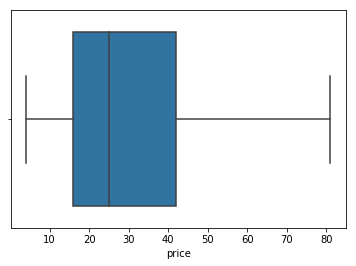

In [131]:
sns.boxplot(df.price);